<a href="https://colab.research.google.com/github/MXNXV-ERR/DeepLearningsAss/blob/main/AnamolyDetectionUsingLSTMwith_SELU_activation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install sklearn

In [ ]:
#!pip install scikit-learn


In [ ]:
import pandas as pd

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("/content/Dataset 2 .csv")

In [ ]:
df.head()


,Date\t,Time,P1,P2,P3,P4,P5,P6,P7,P8,P9
0,15-10-2011,39:55.0,-0.0469,-0.0385,0.00542,0.01121,38.0,52.0,0.0,0.0,0.0
1,15-10-2011,39:55.6,-0.0469,-0.0385,0.00542,0.01121,38.0,52.0,0.0,0.0,0.0
2,15-10-2011,39:57.1,-0.0469,-0.0385,0.00542,0.01121,38.0,52.0,0.0,0.0,0.0
3,15-10-2011,39:58.6,-0.0469,-0.0385,0.00542,0.01121,38.0,52.0,0.0,0.0,0.0
4,15-10-2011,40:02.2,-0.0469,-0.0385,0.00542,0.01121,38.0,52.0,0.0,0.0,0.0


In [ ]:
df.rename({"Date  " : "Date"},inplace = True)
df.head()

,Date\t,Time,P1,P2,P3,P4,P5,P6,P7,P8,P9
0,15-10-2011,39:55.0,-0.0469,-0.0385,0.00542,0.01121,38.0,52.0,0.0,0.0,0.0
1,15-10-2011,39:55.6,-0.0469,-0.0385,0.00542,0.01121,38.0,52.0,0.0,0.0,0.0
2,15-10-2011,39:57.1,-0.0469,-0.0385,0.00542,0.01121,38.0,52.0,0.0,0.0,0.0
3,15-10-2011,39:58.6,-0.0469,-0.0385,0.00542,0.01121,38.0,52.0,0.0,0.0,0.0
4,15-10-2011,40:02.2,-0.0469,-0.0385,0.00542,0.01121,38.0,52.0,0.0,0.0,0.0


In [ ]:

df.groupby(df["Date\t"])

In [ ]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

<Figure size 1200x800 with 0 Axes>

In [ ]:
unique_dates = df['Date\t'].unique()

In [ ]:
unique_dates

array(['15-10-2011', '16-10-2011', '17-10-2011', '18-10-2011',
       '19-10-2011', '20-10-2011', '21-10-2011', '22-10-2011',
       '23-10-2011', '24-10-2011', '25-10-2011', '26-10-2011',
       '27-10-2011', '28-10-2011', '29-10-2011', '30-10-2011',
       '01-11-2011', '02-11-2011', '03-11-2011', '04-11-2011',
       '05-11-2011', '06-11-2011', '08-11-2011', '09-11-2011',
       '11-11-2011', '12-11-2011', '13-11-2011', '14-11-2011'],
      dtype=object)

In [ ]:
date_dataframes = {}
for date in unique_dates:
    date_df = df[df['Date\t'] == date]
    date_dataframes[date] = date_df

# Now date_dataframes is a dictionary where each key is a date, and the corresponding value is a DataFrame for that date
# You can access a specific DataFrame using date_dataframes[date]

# For example, to print the DataFrame for a specific date (replace 'desired_date' with the actual date)
desired_date = '15-10-2011'
print(date_dataframes[desired_date])

          Date\t     Time      P1      P2       P3       P4    P5    P6   P7  \
0     15-10-2011  39:55.0 -0.0469 -0.0385  0.00542  0.01121  38.0  52.0  0.0   
1     15-10-2011  39:55.6 -0.0469 -0.0385  0.00542  0.01121  38.0  52.0  0.0   
2     15-10-2011  39:57.1 -0.0469 -0.0385  0.00542  0.01121  38.0  52.0  0.0   
3     15-10-2011  39:58.6 -0.0469 -0.0385  0.00542  0.01121  38.0  52.0  0.0   
4     15-10-2011  40:02.2 -0.0469 -0.0385  0.00542  0.01121  38.0  52.0  0.0   
...          ...      ...     ...     ...      ...      ...   ...   ...  ...   
1104  15-10-2011  57:33.2 -0.0469 -0.0385  0.00536  0.01106  38.0  52.0  0.0   
1105  15-10-2011  57:34.3 -0.0469 -0.0385  0.00536  0.01106  38.0  52.0  0.0   
1106  15-10-2011  57:34.8 -0.0469 -0.0385  0.00552  0.01096  38.0  52.0  0.0   
1107  15-10-2011  57:36.3 -0.0469 -0.0385  0.00552  0.01096  38.0  52.0  0.0   
1108  15-10-2011  57:37.8 -0.0469 -0.0385  0.00552  0.01096  38.0  52.0  0.0   

       P8   P9  
0     0.0  0.0  
1    

In [ ]:
#Now I can plot for per day
test_df = date_dataframes[unique_dates[2]]

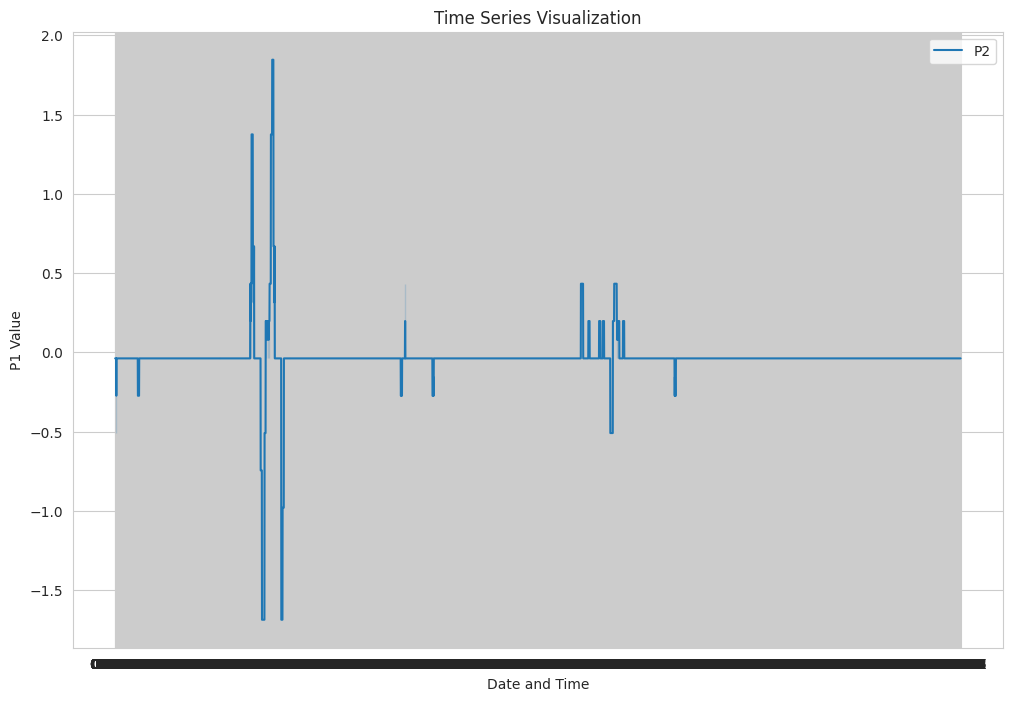

In [ ]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# You can choose which columns to plot, let's plot P1 for example
sns.lineplot(data=test_df, x=test_df["Time"], y='P2', label='P2')
plt.title('Time Series Visualization')
plt.xlabel('Date and Time')
plt.ylabel('P1 Value')
plt.legend()
plt.show()


In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import rcParams
from keras.models import Sequential, Model
from keras.layers import LSTM, RepeatVector, TimeDistributed, Dense, Input

In [ ]:
TRAIN_SIZE = 800
EXT_LSTM_UNITS = 64
INT_LSTM_UNITS = 32

In [ ]:
def load_data(filepath):
  df = pd.read_csv(filepath, delimiter=",")
  features = df.columns[2:]

  # df['timestamp'] = df.iloc[:,0]+''+df.iloc[:,1]

  # # df[col_name] = pd.to_numeric(df[col_name],errors = 'coerce')
  # df = df[['timestamp',features]]
  # df.set_index('timestamp',inplace= True)
  return df[features]


In [ ]:
test = load_data("/content/Dataset 2 .csv")
test.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9
0,-0.0469,-0.0385,0.00542,0.01121,38.0,52,0,0,0
1,-0.0469,-0.0385,0.00542,0.01121,38.0,52,0,0,0
2,-0.0469,-0.0385,0.00542,0.01121,38.0,52,0,0,0
3,-0.0469,-0.0385,0.00542,0.01121,38.0,52,0,0,0
4,-0.0469,-0.0385,0.00542,0.01121,38.0,52,0,0,0


In [ ]:
def compute_seasonal_decomposition(file,col_name):
  df = pd.read_csv(file, delimiter=",")
  df['timestamp'] = df.iloc[:,0]+''+df.iloc[:,1]
  df[col_name] = pd.to_numeric(df[col_name],errors = 'coerce')
  df = df[['timestamp',col_name]]
  df.set_index('timestamp',inplace= True)
  decompose = seasonal_decompose(df, model='additive')
  decompose.plot()

In [ ]:
def split_data(data, train_size):
  train_data = data.iloc[:train_size,:]
  test_data = data.iloc[train_size:,:]
  return train_data,test_data

In [ ]:
def normalize_data(train_data,test_data):
  mean = train_data.mean(axis=0)
  std = train_data.std(axis=0)
  train_data = (train_data-mean)/std
  test_data = (test_data-mean)/std
  return mean,std,train_data,test_data


In [ ]:
def build_model(input_shape,ext_lstm_units,int_lstm_units):
    input_layer = Input(shape=input_shape)
    encoder = LSTM(ext_lstm_units, activation='selu', return_sequences=True)(input_layer)
    encoder_1 = LSTM(int_lstm_units, activation='selu')(encoder)
    repeat = RepeatVector(input_shape[0])(encoder_1)
    decoder = LSTM(int_lstm_units, activation='selu', return_sequences=True)(repeat)
    decoder_1 = LSTM(ext_lstm_units, activation='selu', return_sequences=True)(decoder)
    output_layer = TimeDistributed(Dense(input_shape[1]))(decoder_1)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='mse')
    return model

In [ ]:
import tensorflow as tf

In [ ]:
def train_model(model, train_data):
    train_data = tf.convert_to_tensor(train_data, dtype=tf.float32)
    history = model.fit(train_data, train_data, epochs=50, batch_size=100, validation_split=0.2)
    return history

In [ ]:
def predict(model, test_data):
    """Use LSTM Autoencoder model to predict on test data."""
    test_data = tf.convert_to_tensor(test_data, dtype=tf.float32)
    predictions = model.predict(test_data)
    return predictions

In [ ]:
def calculate_error(test_data, predictions):
    """Calculate mean squared error between test data and predictions."""
    print("test_data shape", test_data.shape)
    print("predictions shape", predictions.shape)
    mse = np.mean(np.power(test_data - predictions, 2), axis=1)
    return mse

In [ ]:
def detect_anamolies(mse):
  threshold = np.mean(mse) + 3*np.std(mse)


  print("Threshold = ",np.round(threshold,2))
  anamolies = np.where(mse > np.round(threshold,2))[0]
  return anamolies

In [ ]:
def plot_results(test_data, anomalies):
    """Plot test data with detected anomalies."""
    plt.subplots(figsize=(14, 10))
    plt.plot(test_data)
    plt.plot(anomalies, test_data['P1'][anomalies], 'ro')
    plt.figure(figsize=(12,4))
    plt.title('P1 Anomaly Detection')
    plt.xlabel('Date')
    plt.ylabel('P1 ')
    plt.grid()
    plt.show()

In [ ]:
df = load_data("Dataset 2 .csv")



In [ ]:
df.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9
0,-0.0469,-0.0385,0.00542,0.01121,38.0,52,0,0,0
1,-0.0469,-0.0385,0.00542,0.01121,38.0,52,0,0,0
2,-0.0469,-0.0385,0.00542,0.01121,38.0,52,0,0,0
3,-0.0469,-0.0385,0.00542,0.01121,38.0,52,0,0,0
4,-0.0469,-0.0385,0.00542,0.01121,38.0,52,0,0,0


In [ ]:
train_data, test_data = split_data(df, TRAIN_SIZE)

In [ ]:
mean, std, train_data, test_data = normalize_data(train_data, test_data)

In [ ]:
print(train_data)

      P1  P2        P3        P4        P5        P6  P7  P8  P9
0    0.0 NaN -0.877799  1.068004 -0.142768 -0.852615 NaN NaN NaN
1    0.0 NaN -0.877799  1.068004 -0.142768 -0.852615 NaN NaN NaN
2    0.0 NaN -0.877799  1.068004 -0.142768 -0.852615 NaN NaN NaN
3    0.0 NaN -0.877799  1.068004 -0.142768 -0.852615 NaN NaN NaN
4    0.0 NaN -0.877799  1.068004 -0.142768 -0.852615 NaN NaN NaN
..   ...  ..       ...       ...       ...       ...  ..  ..  ..
795  0.0 NaN  0.871458 -0.935286 -0.142768 -0.852615 NaN NaN NaN
796  0.0 NaN  0.871458 -0.935286 -0.142768 -0.852615 NaN NaN NaN
797  0.0 NaN  0.871458 -0.935286 -0.142768 -0.852615 NaN NaN NaN
798  0.0 NaN  0.871458 -0.935286 -0.142768 -0.852615 NaN NaN NaN
799  0.0 NaN  0.871458 -0.935286 -0.142768 -0.852615 NaN NaN NaN

[800 rows x 9 columns]


In [ ]:
print("Mean: ", mean)
print("Standard Deviation: ", std)

Mean:  P1    -0.046900
P2    -0.038500
P3     0.005621
P4     0.011050
P5    38.020000
P6    52.421250
P7     0.000000
P8     0.000000
P9     0.000000
dtype: float64
Standard Deviation:  P1    0.032293
P2    0.000000
P3    0.000229
P4    0.000150
P5    0.140088
P6    0.494068
P7    0.000000
P8    0.000000
P9    0.000000
dtype: float64


In [ ]:
INPUT_SHAPE = (train_data.shape[1], 1)
INPUT_SHAPE

(9, 1)

In [ ]:
train_data.shape

(800, 9)

In [ ]:
model= build_model(INPUT_SHAPE,EXT_LSTM_UNITS,INT_LSTM_UNITS)

In [ ]:
history = train_model(model, train_data)


Epoch 1/50
7/7 [==============================] - 11s 161ms/step - loss: nan - val_loss: nan
Epoch 2/50
7/7 [==============================] - 0s 65ms/step - loss: nan - val_loss: nan
Epoch 3/50
7/7 [==============================] - 0s 72ms/step - loss: nan - val_loss: nan
Epoch 4/50
7/7 [==============================] - 1s 80ms/step - loss: nan - val_loss: nan
Epoch 5/50
7/7 [==============================] - 0s 69ms/step - loss: nan - val_loss: nan
Epoch 6/50
7/7 [==============================] - 0s 66ms/step - loss: nan - val_loss: nan
Epoch 7/50
7/7 [==============================] - 0s 71ms/step - loss: nan - val_loss: nan
Epoch 8/50
7/7 [==============================] - 0s 73ms/step - loss: nan - val_loss: nan
Epoch 9/50
7/7 [==============================] - 0s 70ms/step - loss: nan - val_loss: nan
Epoch 10/50
7/7 [==============================] - 0s 72ms/step - loss: nan - val_loss: nan
Epoch 11/50
7/7 [==============================] - 0s 67ms/step - loss: nan - val_loss:

In [ ]:
test_predictions = predict(model, test_data)

5306/5306 [==============================] - 44s 8ms/step


In [ ]:
test_predictions

array([[[nan],
        [nan],
        [nan],
        ...,
        [nan],
        [nan],
        [nan]],

       [[nan],
        [nan],
        [nan],
        ...,
        [nan],
        [nan],
        [nan]],

       [[nan],
        [nan],
        [nan],
        ...,
        [nan],
        [nan],
        [nan]],

       ...,

       [[nan],
        [nan],
        [nan],
        ...,
        [nan],
        [nan],
        [nan]],

       [[nan],
        [nan],
        [nan],
        ...,
        [nan],
        [nan],
        [nan]],

       [[nan],
        [nan],
        [nan],
        ...,
        [nan],
        [nan],
        [nan]]], dtype=float32)

In [ ]:
test_predictions.shape

(169785, 9, 1)

In [ ]:
test_data.shape

(169785, 9)

In [ ]:
mse = calculate_error(test_data, test_predictions.reshape(169785,9))
print("Mean Square Error = ", mse)

test_data shape (169785, 9)
predictions shape (169785, 9)
Mean Square Error =  800      NaN
801      NaN
802      NaN
803      NaN
804      NaN
          ..
170580   NaN
170581   NaN
170582   NaN
170583   NaN
170584   NaN
Length: 169785, dtype: float64


In [ ]:
anomalies = detect_anamolies(mse)
anomalies.shape

Threshold =  nan


(0,)

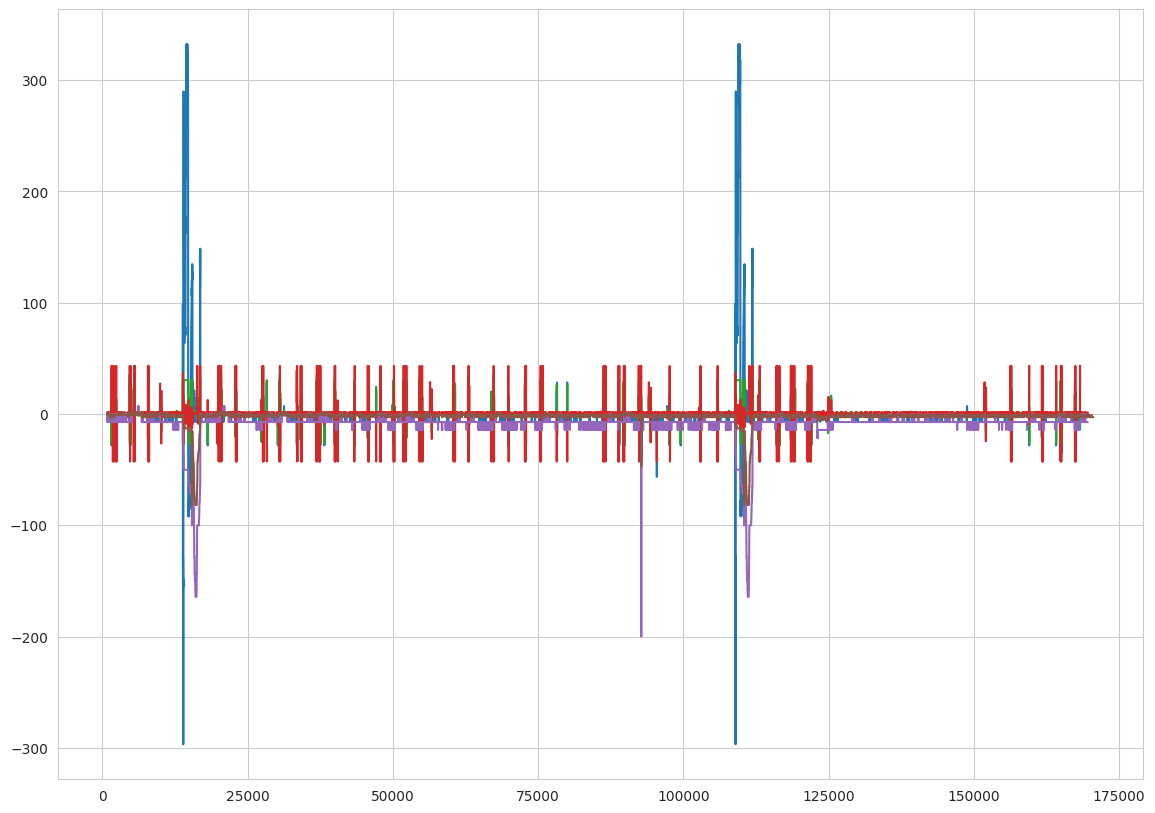

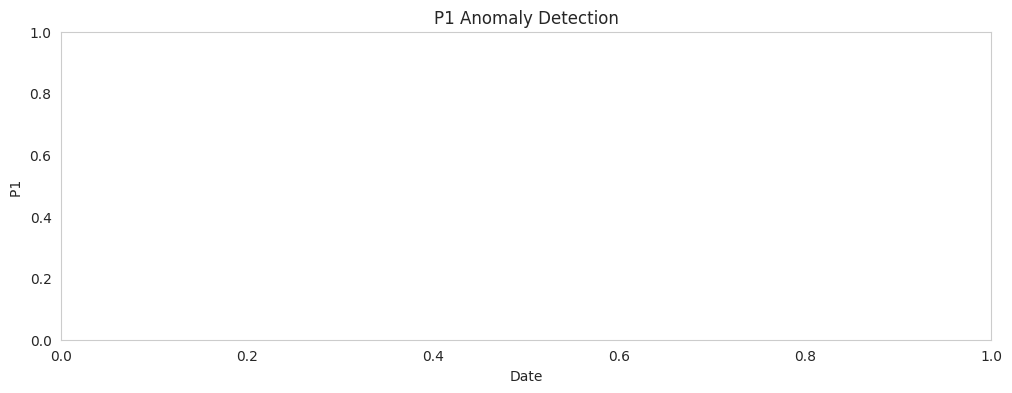

In [ ]:
plot_results(test_data, anomalies)

In [ ]:
def run_script():
  df = load_data("/content/Dataset 2 .csv")
  print(df.head())
  train_data, test_data = split_data(df, TRAIN_SIZE)
  #mean, std, train_data, test_data = normalize_data(train_data, test_data)
  print("####TRAIN DATA#####")
  print(train_data)
  print("###################")
  # print("Mean: ", mean)
  # print("Standard Deviation: ", std)
  INPUT_SHAPE = (train_data.shape[1], 1)
  print("INPUT SHAPE: ",INPUT_SHAPE)
  print("Building model ...")
  model= build_model(INPUT_SHAPE,EXT_LSTM_UNITS,INT_LSTM_UNITS)
  print("Training model ...")
  history = train_model(model, train_data)
  print("PREDICTIONS")
  test_predictions = predict(model, test_data)
  shape = test_data.shape[0]
  mse = calculate_error(test_data, test_predictions.reshape(test_data.shape))
  print("Mean Square Error = ", mse)
  anomalies = detect_anamolies(mse)
  print("ANOMALIES :" ,anomalies)

  #plot_results(test_data,anomalies)
  print("END")


In [ ]:
run_script()

       P1      P2       P3       P4    P5  P6  P7  P8  P9
0 -0.0469 -0.0385  0.00542  0.01121  38.0  52   0   0   0
1 -0.0469 -0.0385  0.00542  0.01121  38.0  52   0   0   0
2 -0.0469 -0.0385  0.00542  0.01121  38.0  52   0   0   0
3 -0.0469 -0.0385  0.00542  0.01121  38.0  52   0   0   0
4 -0.0469 -0.0385  0.00542  0.01121  38.0  52   0   0   0
####TRAIN DATA#####
         P1      P2       P3       P4    P5  P6  P7  P8  P9
0   -0.0469 -0.0385  0.00542  0.01121  38.0  52   0   0   0
1   -0.0469 -0.0385  0.00542  0.01121  38.0  52   0   0   0
2   -0.0469 -0.0385  0.00542  0.01121  38.0  52   0   0   0
3   -0.0469 -0.0385  0.00542  0.01121  38.0  52   0   0   0
4   -0.0469 -0.0385  0.00542  0.01121  38.0  52   0   0   0
..      ...     ...      ...      ...   ...  ..  ..  ..  ..
795 -0.0469 -0.0385  0.00582  0.01091  38.0  52   0   0   0
796 -0.0469 -0.0385  0.00582  0.01091  38.0  52   0   0   0
797 -0.0469 -0.0385  0.00582  0.01091  38.0  52   0   0   0
798 -0.0469 -0.0385  0.00582  0.

Training model ...
Epoch 1/50
7/7 [==============================] - 6s 167ms/step - loss: 434.9923 - val_loss: 371.5020
Epoch 2/50
7/7 [==============================] - 1s 84ms/step - loss: 309.2415 - val_loss: 198.2149
Epoch 3/50
7/7 [==============================] - 0s 68ms/step - loss: 145.4350 - val_loss: 77.0368
Epoch 4/50
7/7 [==============================] - 0s 71ms/step - loss: 52.5559 - val_loss: 30.6440
Epoch 5/50
7/7 [==============================] - 0s 66ms/step - loss: 17.9564 - val_loss: 3.8803
Epoch 6/50
7/7 [==============================] - 0s 68ms/step - loss: 3.3632 - val_loss: 3.8275
Epoch 7/50
7/7 [==============================] - 0s 67ms/step - loss: 2.9099 - val_loss: 1.3291
Epoch 8/50
7/7 [==============================] - 1s 74ms/step - loss: 0.8797 - val_loss: 0.5217
Epoch 9/50
7/7 [==============================] - 0s 69ms/step - loss: 0.4805 - val_loss: 0.2662
Epoch 10/50
7/7 [==============================] - 1s 95ms/step - loss: 0.1406 - val_loss: 0.

In [ ]:
df.iloc[3160,:]

P1    -0.04690
P2    -0.03850
P3     0.00567
P4     0.01126
P5    38.00000
P6    52.00000
P7     0.00000
P8     0.00000
P9     0.00000
Name: 3160, dtype: float64

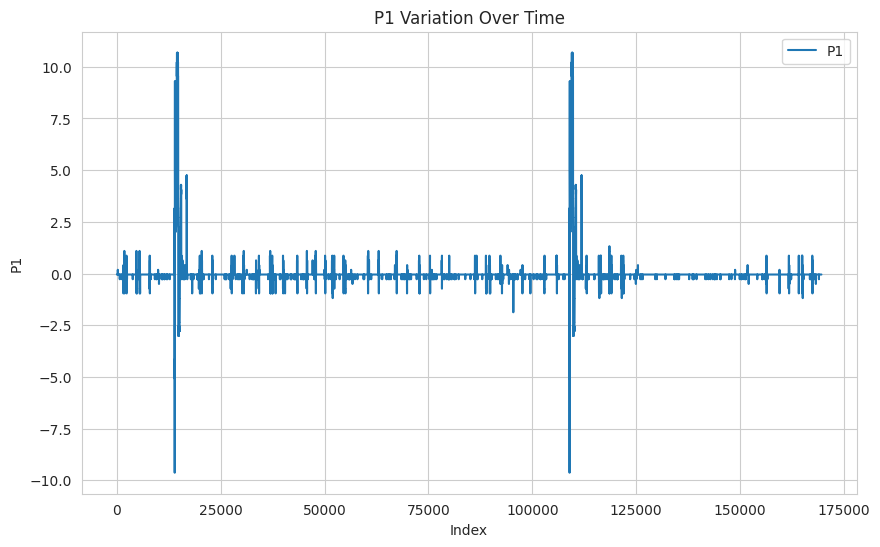

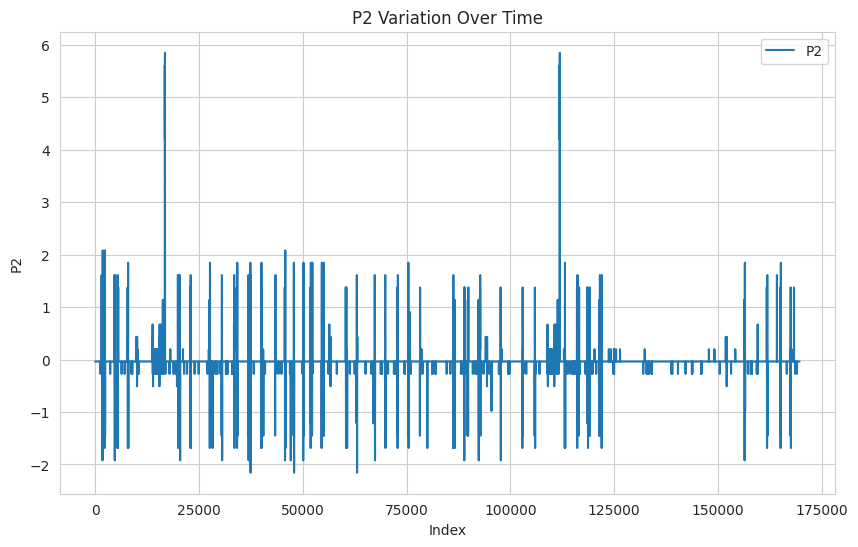

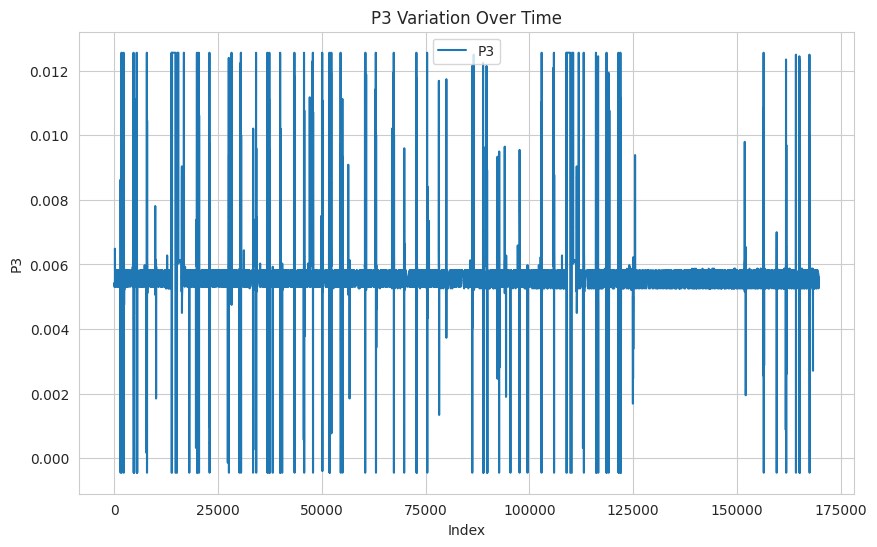

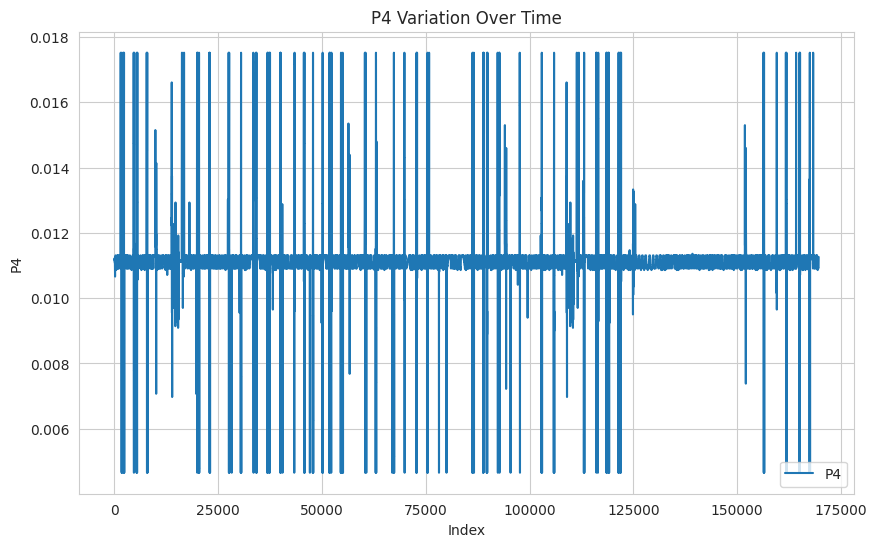

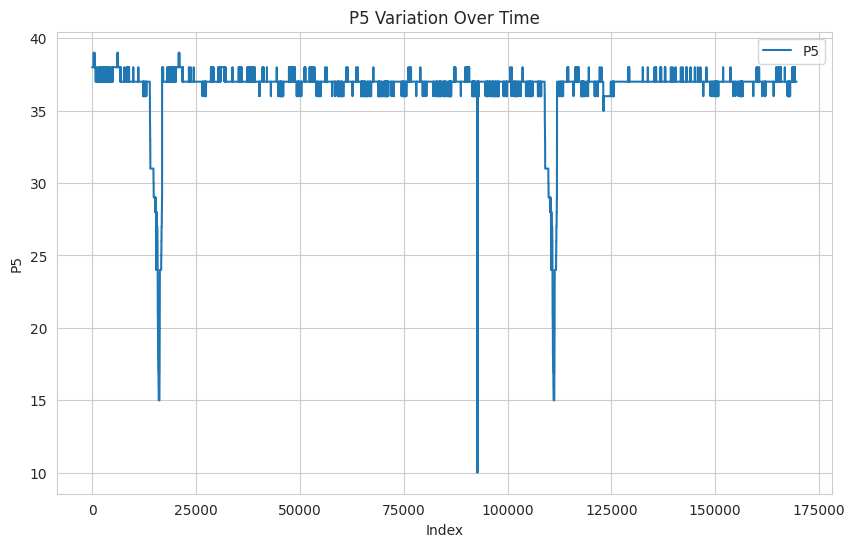

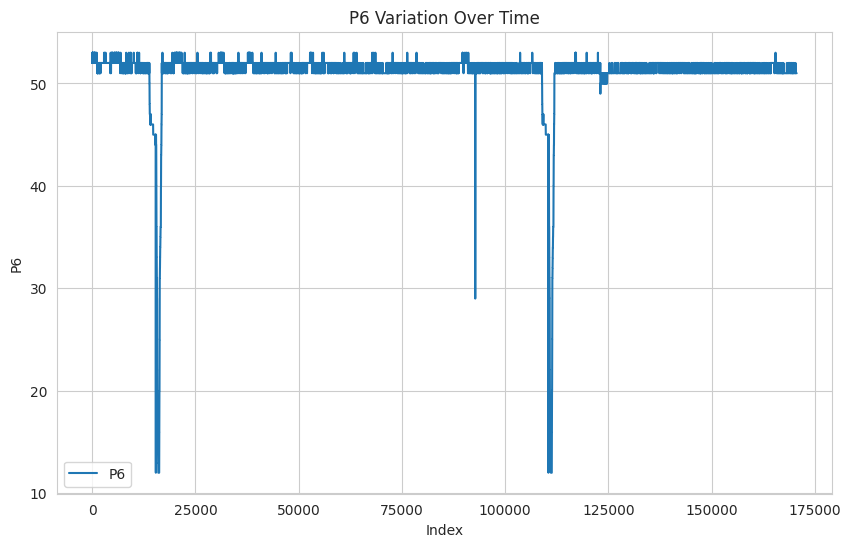

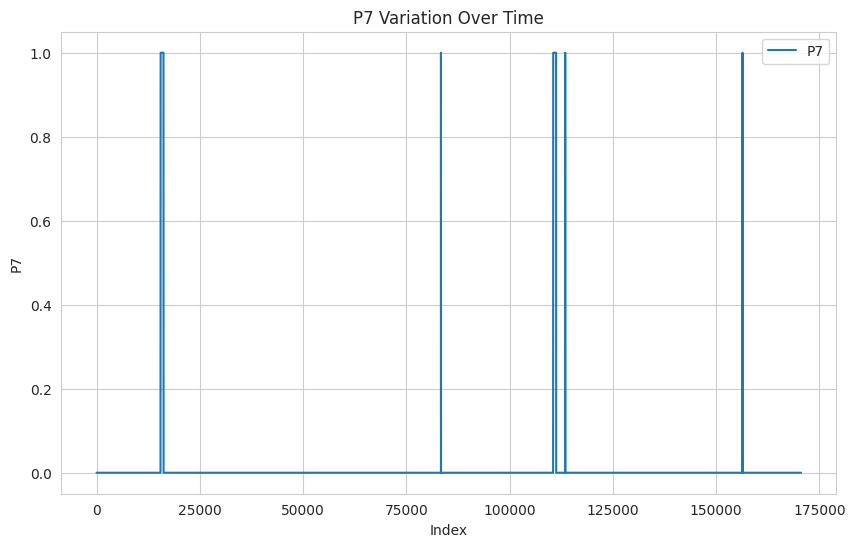

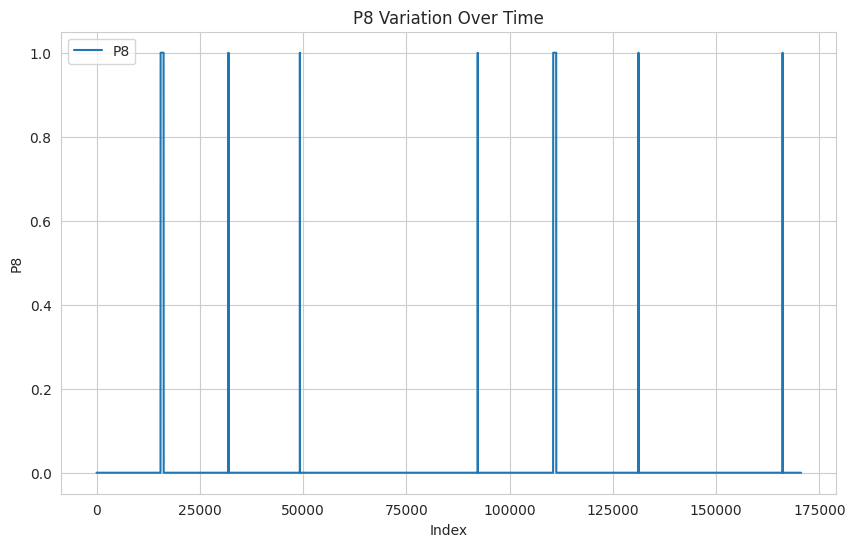

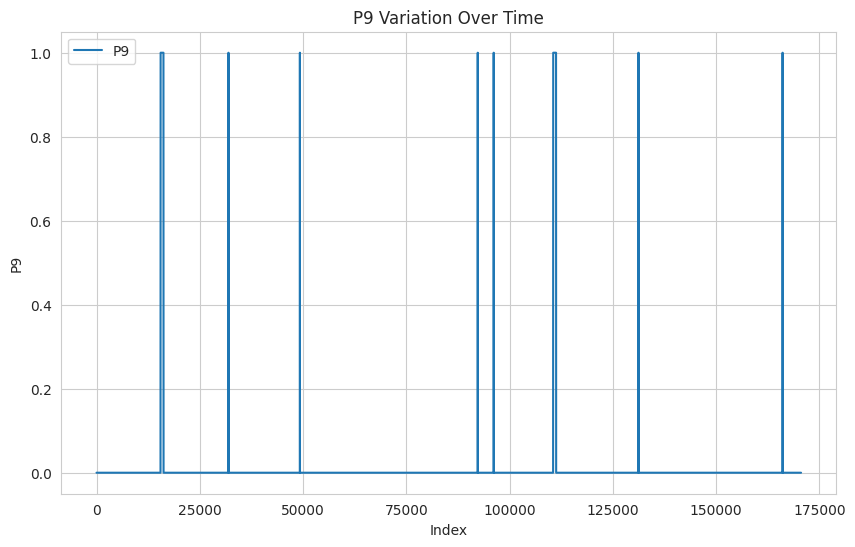

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
# Assuming df is your DataFrame with columns 'Date', 'Time', 'P1', 'P2', ..., 'P9'
# If 'Date' and 'Time' have leading/trailing whitespaces, remove them
df = pd.read_csv("/content/Dataset 2 .csv")
df.columns = df.columns.str.strip()

# If 'Date' and 'Time' are not needed for plotting, you can drop them
params_to_plot = df.drop(['Date', 'Time'], axis=1, errors='ignore')

# Plot each parameter separately
for param in params_to_plot.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(df[param], label=param)
    plt.title(f'{param} Variation Over Time')
    plt.xlabel('Index')
    plt.ylabel(param)
    plt.legend()
    plt.show()

In [ ]:
df_temp = pd.read_csv("/content/Dataset 2 .csv")


In [ ]:
df_temp.iloc[3406
             ,:]

Date\t    16-10-2011
Time         41:15.2
P1           -0.0469
P2           -0.0385
P3           0.00562
P4           0.01096
P5              38.0
P6                52
P7                 0
P8                 0
P9                 0
Name: 3406, dtype: object

In [ ]:
df = load_data("/content/Dataset 2 .csv")
print(df.head())
train_data, test_data = split_data(df, TRAIN_SIZE)
#mean, std, train_data, test_data = normalize_data(train_data, test_data)
print("####TRAIN DATA#####")
print(train_data)
print("###################")
# print("Mean: ", mean)
# print("Standard Deviation: ", std)
INPUT_SHAPE = (train_data.shape[1], 1)
print("INPUT SHAPE: ",INPUT_SHAPE)
print("Building model ...")
model= build_model(INPUT_SHAPE,EXT_LSTM_UNITS,INT_LSTM_UNITS)
print("Training model ...")
history = train_model(model, train_data)
print("PREDICTIONS")
test_predictions = predict(model, test_data)
shape = test_data.shape[0]

       P1      P2       P3       P4    P5  P6  P7  P8  P9
0 -0.0469 -0.0385  0.00542  0.01121  38.0  52   0   0   0
1 -0.0469 -0.0385  0.00542  0.01121  38.0  52   0   0   0
2 -0.0469 -0.0385  0.00542  0.01121  38.0  52   0   0   0
3 -0.0469 -0.0385  0.00542  0.01121  38.0  52   0   0   0
4 -0.0469 -0.0385  0.00542  0.01121  38.0  52   0   0   0
####TRAIN DATA#####
         P1      P2       P3       P4    P5  P6  P7  P8  P9
0   -0.0469 -0.0385  0.00542  0.01121  38.0  52   0   0   0
1   -0.0469 -0.0385  0.00542  0.01121  38.0  52   0   0   0
2   -0.0469 -0.0385  0.00542  0.01121  38.0  52   0   0   0
3   -0.0469 -0.0385  0.00542  0.01121  38.0  52   0   0   0
4   -0.0469 -0.0385  0.00542  0.01121  38.0  52   0   0   0
..      ...     ...      ...      ...   ...  ..  ..  ..  ..
795 -0.0469 -0.0385  0.00582  0.01091  38.0  52   0   0   0
796 -0.0469 -0.0385  0.00582  0.01091  38.0  52   0   0   0
797 -0.0469 -0.0385  0.00582  0.01091  38.0  52   0   0   0
798 -0.0469 -0.0385  0.00582  0.

Training model ...
Epoch 1/50
7/7 [==============================] - 6s 157ms/step - loss: 454.6731 - val_loss: 407.7164
Epoch 2/50
7/7 [==============================] - 1s 79ms/step - loss: 367.5991 - val_loss: 354.4633
Epoch 3/50
7/7 [==============================] - 0s 69ms/step - loss: 293.4836 - val_loss: 237.6962
Epoch 4/50
7/7 [==============================] - 0s 70ms/step - loss: 213.7905 - val_loss: 165.9696
Epoch 5/50
7/7 [==============================] - 0s 67ms/step - loss: 131.0651 - val_loss: 69.2980
Epoch 6/50
7/7 [==============================] - 0s 68ms/step - loss: 39.5943 - val_loss: 10.0310
Epoch 7/50
7/7 [==============================] - 1s 129ms/step - loss: 12.4403 - val_loss: 4.5385
Epoch 8/50
7/7 [==============================] - 1s 145ms/step - loss: 3.6882 - val_loss: 1.9894
Epoch 9/50
7/7 [==============================] - 1s 138ms/step - loss: 1.3199 - val_loss: 1.1211
Epoch 10/50
7/7 [==============================] - 1s 140ms/step - loss: 0.7653 - 

In [ ]:
test_predictions.shape

(169785, 9, 1)

In [ ]:
test_data.shape

(169785, 9)

In [ ]:
tp = test_predictions.reshape(test_data.shape)

In [ ]:
mse = calculate_error(test_data, tp)

test_data shape (169785, 9)
predictions shape (169785, 9)


In [ ]:
print("Mean Square Error = ", mse)
anomalies = detect_anamolies(mse)
print("ANOMALIES :" ,anomalies)

Mean Square Error =  800       0.007931
801       0.007931
802       0.007931
803       0.007931
804       0.007931
            ...   
170580         NaN
170581         NaN
170582         NaN
170583         NaN
170584         NaN
Length: 169785, dtype: float64
Threshold =  14.07
ANOMALIES : [ 13072  13073  13074 ... 111039 111040 111041]


In [ ]:
anomalies.shape

(4143,)

In [ ]:
df_temp = pd.read_csv("/content/Dataset 2 .csv")


In [ ]:
def unique(list1):

    # insert the list to the set
    list_set = set(list1)
    # convert the set to the list
    unique_list = (list(list_set))
    for x in unique_list:
        print (x)

In [ ]:
dates = []
for index in anomalies:
  dates.append(df_temp.iloc[index,:1].values[0])

unique(dates)

18-10-2011
03-11-2011
06-11-2011


In [ ]:
df.iloc[4508,:1].values[0]

-0.0469